In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix, auc, roc_curve, RocCurveDisplay,plot_roc_curve
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load the data
data = pd.read_csv('data.csv', index_col = 0)
data.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [ ]:
#to convert categorical data into numerical variables using get dummies
data = pd.get_dummies(data, columns=['location','country','gender','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos'])
data

,age,vis_wuhan,from_wuhan,result,location_0,location_1,location_2,location_3,location_4,location_5,...,diff_sym_hos_6,diff_sym_hos_7,diff_sym_hos_8,diff_sym_hos_9,diff_sym_hos_10,diff_sym_hos_11,diff_sym_hos_12,diff_sym_hos_13,diff_sym_hos_14,diff_sym_hos_15
0,66.0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,56.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,46.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,60.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,58.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,24.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
859,35.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,49.4,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
861,49.4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer


# x = ColumnTransformer([('encoder', OneHotEncoder(),['location','country','gender','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6'])], remainder= "passthrough")
# data=x.fit_transform(data).toarray()
# data = pd.DataFrame(data)
# data

In [ ]:
X = data.loc[:, data.columns != 'result'] #select all columns except 'result' column
features_X = pd.DataFrame(X)
features_X

,age,vis_wuhan,from_wuhan,location_0,location_1,location_2,location_3,location_4,location_5,location_6,...,diff_sym_hos_6,diff_sym_hos_7,diff_sym_hos_8,diff_sym_hos_9,diff_sym_hos_10,diff_sym_hos_11,diff_sym_hos_12,diff_sym_hos_13,diff_sym_hos_14,diff_sym_hos_15
0,66.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,56.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,46.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,60.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,58.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,24.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
859,35.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,49.4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,49.4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = data.loc[:,'result'] #select only 'result' column
featuresy = pd.DataFrame(y)
featuresy

,result
0,1
1,0
2,0
3,0
4,0
...,...
858,1
859,0
860,0
861,0


In [ ]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
# Apply Normalization
# from sklearn.preprocessing import MinMaxScaler
# X_train_norm = MinMaxScaler().fit_transform(X_train)
# X_test_norm = MinMaxScaler().fit_transform(X_test)

# 1- Logistic Regression

best_lr.penalty = 'l1'
best_lr.C = 10
best_lr.solver = 'liblinear'

* Evaluation metrics for logistic regression dataset *

Recall Score:  0.8181818181818182
Precision Score:  0.9473684210526315
F1 Score:  0.8780487804878049
Accuracy:  0.9710982658959537


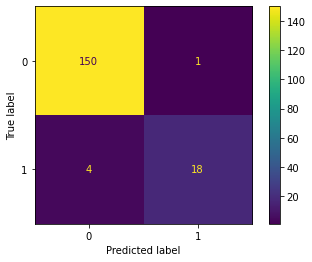

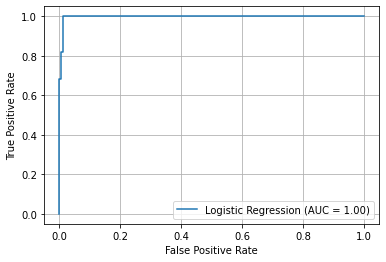

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression()

#Apply Tuning hyperparameters to select the best C, penalty, and the best solver
lrparam_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],'penalty': ['none','l1', 'l2'],'solver': ['lbfgs', 'liblinear']}
classifier_lr = GridSearchCV(log_reg, param_grid = lrparam_grid)
best_lr = classifier_lr.fit(X_train,y_train).best_estimator_

print(f"{best_lr.penalty = }\n{best_lr.C = }\n{best_lr.solver = }\n")

pred_lr = best_lr.predict(X_test)


# 2- Naïve Bayes

best_NB.var_smoothing = 0.001873817422860383

* Evaluation metrics for Naive Bayes dataset *

Recall Score:  0.6818181818181818
Precision Score:  0.8823529411764706
F1 Score:  0.7692307692307693
Accuracy:  1.0


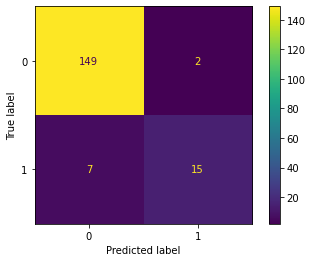

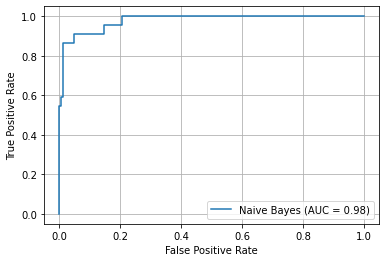

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

#Apply hyper parameter tuning
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
classifier_NB = GridSearchCV(estimator=nb_classifier, param_grid = params_NB)
best_NB = classifier_NB.fit(X_train, y_train).best_estimator_

print(f"{best_NB.var_smoothing = }\n")

pred_nb = best_NB.predict(X_test)
recall_nb = rs(y_test,pred_nb)
precision_nb = ps(y_test,pred_nb)
f1_nb = fs(y_test,pred_nb)
ma_nb = best_NB.score(X_test,pred_nb)

print('* Evaluation metrics for Naive Bayes dataset *\n')
print('Recall Score: ',recall_nb)
print('Precision Score: ',precision_nb)
print('F1 Score: ',f1_nb)
print('Accuracy: ',ma_nb)

# Confusion Matrix
plot_confusion_matrix(best_NB, X_test, y_test)

# ROC curve
plot_roc_curve(best_NB, X_test, y_test, name='Naive Bayes')
plt.grid()
plt.savefig('NB ROC.png')

# 3- Support Vector Machines

best_svm.kernel = 'rbf'
best_svm.C = 1000
best_svm.degree = 1

* Evaluation metrics for Support Vector Machine dataset *

Recall Score:  0.8636363636363636
Precision Score:  0.8636363636363636
F1 Score:  0.8636363636363636
Accuracy:  0.9653179190751445


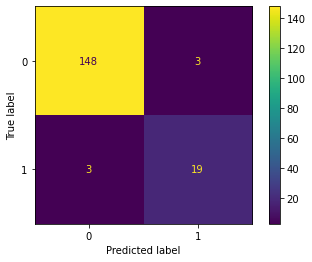

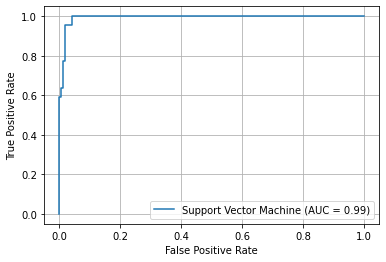

In [ ]:
from sklearn.svm import SVC

svm = SVC()

#Apply hyper parameter tuning
svm_param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],'kernel': ['poly', 'rbf','sigmoid'],'degree': list(range(1,10))}
classifier_svm = GridSearchCV(svm, svm_param_grid, cv=10)
best_svm = classifier_svm.fit(X_train,y_train).best_estimator_
print(f"{best_svm.kernel = }\n{best_svm.C = }\n{best_svm.degree = }\n")

pred_svm = best_svm.predict(X_test)
recall_svm = rs(y_test,pred_svm)
precision_svm = ps(y_test,pred_svm)
f1_svm = fs(y_test,pred_svm)
ma_svm = best_svm.score(X_test,y_test)

print('* Evaluation metrics for Support Vector Machine dataset *\n')
print('Recall Score: ',recall_svm)
print('Precision Score: ',precision_svm)
print('F1 Score: ',f1_svm)
print('Accuracy: ',ma_svm)

# Confusion Matrix
plot_confusion_matrix(best_svm, X_test, y_test)

# ROC curve
plot_roc_curve(best_svm, X_test, y_test, name='Support Vector Machine')
plt.grid()
plt.savefig('SVM ROC.png')

# 4- K-Nearest Neighbors

In [ ]:
print(X_train.shape)

(690, 293)


best_knn.n_neighbors = 1

* Evaluation metrics for K-Nearest Neighbors dataset *

Recall Score:  0.7272727272727273
Precision Score:  0.7272727272727273
F1 Score:  0.8636363636363636
Accuracy:  0.930635838150289


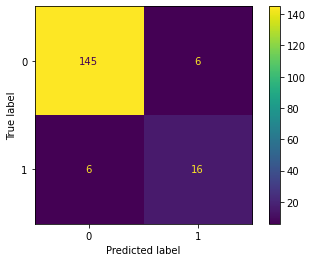

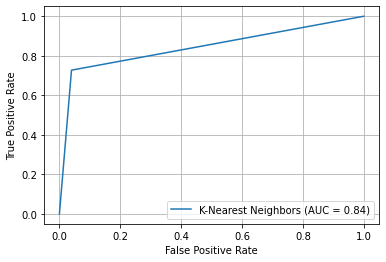

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()

# the size of trainig is 690 so the max_k = sqrt(690) = 26
maxi_k = 26

#Apply hyper parameter tuning
knn_param_grid = {"n_neighbors": list(range(1, maxi_k, 2))}
classifier_knn = GridSearchCV(knn, knn_param_grid, cv=10)
best_knn = classifier_knn.fit(X_train,y_train).best_estimator_
print(f"{best_knn.n_neighbors = }\n")

pred_knn = best_knn.predict(X_test)
recall_knn = rs(y_test,pred_knn)
precision_knn = ps(y_test,pred_knn)
f1_knn = fs(y_test,pred_svm)
ma_knn = best_knn.score(X_test,y_test)

print('* Evaluation metrics for K-Nearest Neighbors dataset *\n')
print('Recall Score: ',recall_knn)
print('Precision Score: ',precision_knn)
print('F1 Score: ',f1_knn)
print('Accuracy: ',ma_knn)

# Confusion Matrix
plot_confusion_matrix(best_knn, X_test, y_test)

# ROC curve
plot_roc_curve(best_knn, X_test, y_test, name='K-Nearest Neighbors')
plt.grid()
plt.savefig('KNN ROC.png')

# 5- Decission Tree

best_dt.max_depth = 10
best_dt.criterion = 'gini'

* Evaluation metrics for Decission Tree dataset *

Recall Score:  0.7727272727272727
Precision Score:  0.8095238095238095
F1 Score:  0.7906976744186046
Accuracy:  0.9479768786127167


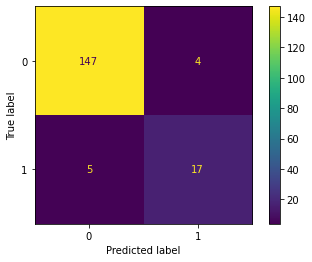

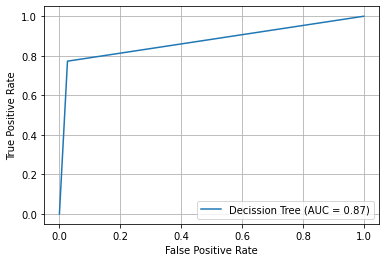

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

#Apply hyper parameter tuning
dt_param_grid = [{'criterion': ['gini', 'entropy'],'max_depth': list(range(4,13,2))}]
classifier_dt = GridSearchCV(dt, dt_param_grid, cv=10)
best_dt = classifier_dt.fit(X_train,y_train).best_estimator_
print(f"{best_dt.max_depth = }\n{best_dt.criterion = }\n")

pred_dt = best_dt.predict(X_test)
recall_dt = rs(y_test,pred_dt)
precision_dt = ps(y_test,pred_dt)
f1_dt = fs(y_test,pred_dt)
ma_dt = best_dt.score(X_test,y_test)

print('* Evaluation metrics for Decission Tree dataset *\n')
print('Recall Score: ',recall_dt)
print('Precision Score: ',precision_dt)
print('F1 Score: ',f1_dt)
print('Accuracy: ',ma_dt)

# Confusion Matrix
plot_confusion_matrix(best_dt, X_test, y_test)

# ROC curve
plot_roc_curve(best_dt, X_test, y_test, name='Decission Tree')
plt.grid()
plt.savefig('DT ROC.png')

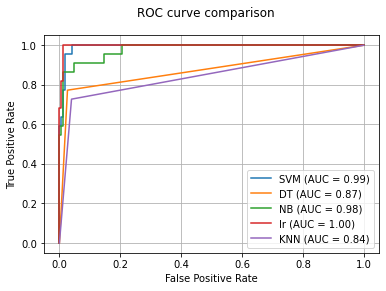

In [ ]:
# ROC curves
svm_roc = plot_roc_curve(best_svm, X_test, y_test, name='SVM')
dt_roc = plot_roc_curve(best_dt, X_test, y_test, name='DT', ax=svm_roc.ax_)
nb_roc = plot_roc_curve(best_NB, X_test, y_test, name='NB', ax=dt_roc.ax_)
lr_roc = plot_roc_curve(best_lr, X_test, y_test, name='lr', ax=nb_roc.ax_)
knn_roc = plot_roc_curve(best_knn, X_test, y_test, name='KNN', ax=lr_roc.ax_)
knn_roc.figure_.suptitle("ROC curve comparison")
plt.savefig('ALL ROC CURVES.png')
plt.grid()

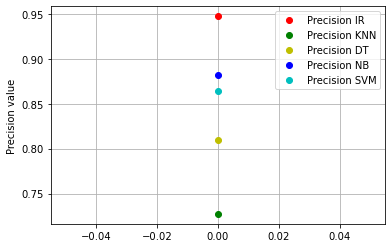

In [ ]:
plt.plot(precision_lr,'ro', label='Precision lR')
plt.plot(precision_knn,'go', label='Precision KNN')
plt.plot(precision_dt,'yo', label='Precision DT')
plt.plot(precision_nb,'bo', label='Precision NB')
plt.plot(precision_svm,'co', label='Precision SVM')

plt.ylabel("Precision value")
plt.legend(loc='best')
plt.grid()
plt.savefig('Precission.png')
plt.show()


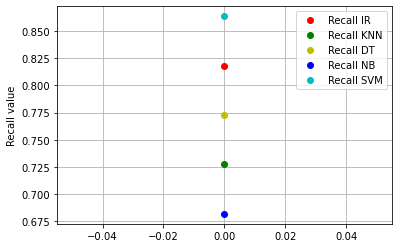

In [ ]:
plt.plot(recall_lr,'ro', label='Recall lR')
plt.plot(recall_knn,'go', label='Recall KNN')
plt.plot(recall_dt,'yo', label='Recall DT')
plt.plot(recall_nb,'bo', label='Recall NB')
plt.plot(recall_svm,'co', label='Recall SVM')

plt.ylabel("Recall value")
plt.legend(loc='best')
plt.grid()
plt.savefig('RECALL.png')
plt.show()

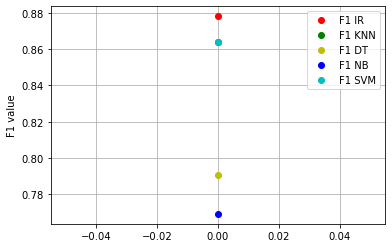

In [ ]:
plt.plot(f1_lr,'ro', label='F1 lR')
plt.plot(f1_knn,'go', label='F1 KNN')
plt.plot(f1_dt,'yo', label='F1 DT')
plt.plot(f1_nb,'bo', label='F1 NB')
plt.plot(f1_svm,'co', label='F1 SVM')

plt.ylabel("F1 value")
plt.legend(loc='best')
plt.grid()
plt.savefig('F1-SCORE.png')
plt.show()

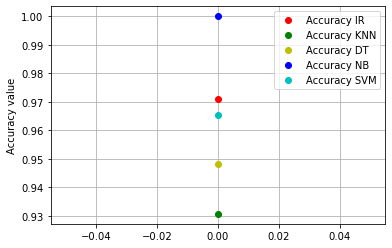

In [ ]:
plt.plot(ma_lr,'ro', label='Accuracy lR')
plt.plot(ma_knn,'go', label='Accuracy KNN')
plt.plot(ma_dt,'yo', label='Accuracy DT')
plt.plot(ma_nb,'bo', label='Accuracy NB')
plt.plot(ma_svm,'co', label='Accuracy SVM')

plt.ylabel("Accuracy value")
plt.legend(loc='best')
plt.grid()
plt.savefig('ACCURACY.png')
plt.show()